##### Pandas DataFrame //
Create DataFrame *Manually*

In [1]:
import pandas as pd
import numpy as np

In [2]:
# Create a DataFrame through a two-dimensional array
df1 = pd.DataFrame([
    ['joe', 'san', 'andy'], 
    [70, 80, 90],
])
df1

,0,1,2
0,joe,san,andy
1,70,80,90


In [3]:
# Create a DataFrame with index
df2 = pd.DataFrame([
    ['joe', 'san', 'andy'], 
    [70, 80, 90],
], index = ['first', 'second'],     # index parameter for ROW index
    columns =['a', 'b', 'c'] )      # columns parameter for COLUMN index

df2

,a,b,c
first,joe,san,andy
second,70,80,90


In [4]:
df2.index

Index(['first', 'second'], dtype='object')

In [5]:
df2.columns

Index(['a', 'b', 'c'], dtype='object')

In [6]:
df2.values

array([['joe', 'san', 'andy'],
       [70, 80, 90]], dtype=object)

In [7]:
# Create a DataFrame through a dictionary
df3 = pd.DataFrame({
    'name': ['joe', 'san', 'andy'],     # 'key' becomes COLUMN index
    'sex': ['male', 'male', 'female'],
    'age':[10, 20, 30],
    'id': 3,
}, index = ['first', 'second', 'third']) # "index" parameter defines ROW index
df3

,name,sex,age,id
first,joe,male,10,3
second,san,male,20,3
third,andy,female,30,3


In [8]:
df3.index

Index(['first', 'second', 'third'], dtype='object')

In [9]:
df3.columns

Index(['name', 'sex', 'age', 'id'], dtype='object')

In [10]:
df3.values

array([['joe', 'male', 10, 3],
       ['san', 'male', 20, 3],
       ['andy', 'female', 30, 3]], dtype=object)

In [11]:
df3['name']

first      joe
second     san
third     andy
Name: name, dtype: object

In [12]:
# Create Data Frame through np.arange().reshape()
df4 = pd.DataFrame(np.arange(20).reshape(4,5), index = ['c', 'a', 'd', 'b'])
df4

,0,1,2,3,4
c,0,1,2,3,4
a,5,6,7,8,9
d,10,11,12,13,14
b,15,16,17,18,19


##### Operations

In [88]:
df4.sum()   # default axis = 0 keeps the column element values, and moves up and down.

0    30
1    34
2    38
3    42
4    46
dtype: int64

In [90]:
df4.sum(axis = 1)  # axis = 1 keeps the row element values, and moves left and right. 

c    10
a    35
d    60
b    85
dtype: int64

##### About the DataFrame axis = 0 and 1, the tricky point

In [122]:
np.random.seed(0)
df5 = pd.DataFrame(np.random.randn(4,5), index = ['Ohio', 'Colorado', 'Oregan', 'Florida'],
                  columns = list('toefr'))
df5

,t,o,e,f,r
Ohio,1.764052,0.400157,0.978738,2.240893,1.867558
Colorado,-0.977278,0.950088,-0.151357,-0.103219,0.410599
Oregan,0.144044,1.454274,0.761038,0.121675,0.443863
Florida,0.333674,1.494079,-0.205158,0.313068,-0.854096


In [123]:
f = lambda x: x.max() - x.min()
df5.apply(f)      # default axis = 0, moves up and down

t    2.741330
o    1.093922
e    1.183896
f    2.344112
r    2.721654
dtype: float64

In [124]:
df5.apply(f, axis = 0)

t    2.741330
o    1.093922
e    1.183896
f    2.344112
r    2.721654
dtype: float64

In [125]:
df5.apply(f, axis = 1)

Ohio        1.840736
Colorado    1.927366
Oregan      1.332598
Florida     2.348175
dtype: float64

In [111]:
# df4.iloc[0,:]     # numeric row index is coexistence with self-defined row index
# DataFrame iloc[], loc[] return a Series object
df4.loc['c',:].idxmax()    # return 'c' row maxium value's column index
df4.loc[:,2].idxmin()      # return 2 column row min value's row index

'c'

In [143]:
n= df4.loc['c',:].describe().shape[0] # returns a Series object, with index 'count','mean', etc
#df4.loc['c',:].describe().index[0]
for i in range(n):
    print("{}= {}".format(df4.loc['c',:].describe().index[i], df4.loc['c',:].describe()[i]))
#df4.loc['c',:].describe()['count']

count= 5.0
mean= 2.0
std= 1.5811388300841898
min= 0.0
25%= 1.0
50%= 2.0
75%= 3.0
max= 4.0


##### Self-definition Operation

In [13]:
# DataFrame apply() can apply the self-defined function to each column or row
def f(x):
    # output a DataFrame
    return pd.Series([x.min(), x.max()], index = ['min', 'max'])

df4.apply(f)      # default axis = 0, apply f() to row's element

,0,1,2,3,4
min,0,1,2,3,4
max,15,16,17,18,19


In [14]:
df4.apply(f, axis = 1)  # apply f() to column's element

,min,max
c,0,4
a,5,9
d,10,14
b,15,19


In [15]:
# DataFrame applymap() apply self-defined function to *every* element
# map() ONLY works for Series
def f(x):
    return x * 5 -2

df4.applymap(f)

,0,1,2,3,4
c,-2,3,8,13,18
a,23,28,33,38,43
d,48,53,58,63,68
b,73,78,83,88,93


get data and crud operations

In [16]:
# append a column
df3['city'] = ['beijing', 'shanghai', 'chengdu']
df3

,name,sex,age,id,city
first,joe,male,10,3,beijing
second,san,male,20,3,shanghai
third,andy,female,30,3,chengdu


In [17]:
# remove a column
df3.pop('city')

first      beijing
second    shanghai
third      chengdu
Name: city, dtype: object

In [18]:
df3


,name,sex,age,id
first,joe,male,10,3
second,san,male,20,3
third,andy,female,30,3


In [19]:
df3['age'] = [18,19,20]
df3

,name,sex,age,id
first,joe,male,18,3
second,san,male,19,3
third,andy,female,20,3


In [20]:
df3.loc['second']

name     san
sex     male
age       19
id         3
Name: second, dtype: object

In [21]:
df3.loc['second',['age', 'sex']]

age      19
sex    male
Name: second, dtype: object

In [22]:
df3.loc['fourth'] = ['peter', 'female', 22, 4]  # insert a row

In [23]:
df3

,name,sex,age,id
first,joe,male,18,3
second,san,male,19,3
third,andy,female,20,3
fourth,peter,female,22,4


In [24]:
df3.drop('fourth')   # remove a row

,name,sex,age,id
first,joe,male,18,3
second,san,male,19,3
third,andy,female,20,3


##### Import Data from CSV

In [25]:
filepath = "./data/FAO_database.csv"
data = pd.read_csv(filepath, encoding = "ISO-8859-1")
type(data)

pandas.core.frame.DataFrame

In [26]:
# preview the data
data.head()


,Area Abbreviation,Area Code,Area,Item Code,Item,Element Code,Element,Unit,latitude,longitude,...,Y2004,Y2005,Y2006,Y2007,Y2008,Y2009,Y2010,Y2011,Y2012,Y2013
0,AF,2,Afghanistan,2511,Wheat and products,5142,Food,1000 tonnes,33.94,67.71,...,3249.0,3486.0,3704.0,4164.0,4252.0,4538.0,4605.0,4711.0,4810,4895
1,AF,2,Afghanistan,2805,Rice (Milled Equivalent),5142,Food,1000 tonnes,33.94,67.71,...,419.0,445.0,546.0,455.0,490.0,415.0,442.0,476.0,425,422
2,AF,2,Afghanistan,2513,Barley and products,5521,Feed,1000 tonnes,33.94,67.71,...,58.0,236.0,262.0,263.0,230.0,379.0,315.0,203.0,367,360
3,AF,2,Afghanistan,2513,Barley and products,5142,Food,1000 tonnes,33.94,67.71,...,185.0,43.0,44.0,48.0,62.0,55.0,60.0,72.0,78,89
4,AF,2,Afghanistan,2514,Maize and products,5521,Feed,1000 tonnes,33.94,67.71,...,120.0,208.0,233.0,249.0,247.0,195.0,178.0,191.0,200,200


In [27]:
data.shape

(21477, 63)

In [28]:
data.ndim

2

In [29]:
# show columns data type
data.dtypes

Area Abbreviation     object
Area Code              int64
Area                  object
Item Code              int64
Item                  object
                      ...   
Y2009                float64
Y2010                float64
Y2011                float64
Y2012                  int64
Y2013                  int64
Length: 63, dtype: object

In [30]:
# change column 'Item Code' to str type
data['Item Code'].astype(str)

0        2511
1        2805
2        2513
3        2513
4        2514
         ... 
21472    2948
21473    2960
21474    2960
21475    2961
21476    2928
Name: Item Code, Length: 21477, dtype: object

In [31]:
# show summary information
data['Y2013'].describe()   # float64 summary information

count     21477.000000
mean        575.557480
std        6218.379479
min        -246.000000
25%           0.000000
50%           8.000000
75%          90.000000
max      489299.000000
Name: Y2013, dtype: float64

In [32]:
data['Area'].describe()   # obj summary information

count     21477
unique      174
top       Spain
freq        150
Name: Area, dtype: object

In [33]:
data.describe()   # return numeric columns' summary info

,Area Code,Item Code,Element Code,latitude,longitude,Y1961,Y1962,Y1963,Y1964,Y1965,...,Y2004,Y2005,Y2006,Y2007,Y2008,Y2009,Y2010,Y2011,Y2012,Y2013
count,21477.000000,21477.000000,21477.000000,21477.000000,21477.000000,17938.000000,17938.000000,17938.000000,17938.000000,17938.000000,...,21128.000000,21128.000000,21373.000000,21373.000000,21373.000000,21373.000000,21373.000000,21373.000000,21477.000000,21477.000000
mean,125.449411,2694.211529,5211.687154,20.450613,15.794445,195.262069,200.782250,205.464600,209.925577,217.556751,...,486.690742,493.153256,496.319328,508.482104,522.844898,524.581996,535.492069,553.399242,560.569214,575.557480
std,72.868149,148.973406,146.820079,24.628336,66.012104,1864.124336,1884.265591,1861.174739,1862.000116,2014.934333,...,5001.782008,5100.057036,5134.819373,5298.939807,5496.697513,5545.939303,5721.089425,5883.071604,6047.950804,6218.379479
min,1.000000,2511.000000,5142.000000,-40.900000,-172.100000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-169.000000,-246.000000
25%,63.000000,2561.000000,5142.000000,6.430000,-11.780000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,120.000000,2640.000000,5142.000000,20.590000,19.150000,1.000000,1.000000,1.000000,1.000000,1.000000,...,6.000000,6.000000,7.000000,7.000000,7.000000,7.000000,7.000000,8.000000,8.000000,8.000000
75%,188.000000,2782.000000,5142.000000,41.150000,46.870000,21.000000,22.000000,23.000000,24.000000,25.000000,...,75.000000,77.000000,78.000000,80.000000,82.000000,83.000000,83.000000,86.000000,88.000000,90.000000
max,276.000000,2961.000000,5521.000000,64.960000,179.410000,112227.000000,109130.000000,106356.000000,104234.000000,119378.000000,...,360767.000000,373694.000000,388100.000000,402975.000000,425537.000000,434724.000000,451838.000000,462696.000000,479028.000000,489299.000000


##### Select Columns
1. data.column_name
2. data['column_name']
3. data.iloc[:,<column_number>]
4. data.loc[:, ['comumn_name', ...]]

In [34]:
# data.column_name
data.Area.head()

0    Afghanistan
1    Afghanistan
2    Afghanistan
3    Afghanistan
4    Afghanistan
Name: Area, dtype: object

In [35]:
# data['column_name']
data[['Area', 'Item']].head()

,Area,Item
0,Afghanistan,Wheat and products
1,Afghanistan,Rice (Milled Equivalent)
2,Afghanistan,Barley and products
3,Afghanistan,Barley and products
4,Afghanistan,Maize and products


In [36]:
# data['column_name'] get a Series, then can Series operation
ret = [data['Y2013'].sum(),data['Y2013'].mean(),data['Y2013'].median(),
      data['Y2013'].nunique(),data['Y2013'].max(),data['Y2013'].min(),]
ret

[12361248, 575.5574800949853, 8.0, 2107, 489299, -246]

In [37]:
# data.iloc[...]
data.iloc[:,[0,1,3,5]]

,Area Abbreviation,Area Code,Item Code,Element Code
0,AF,2,2511,5142
1,AF,2,2805,5142
2,AF,2,2513,5521
3,AF,2,2513,5142
4,AF,2,2514,5521
...,...,...,...,...
21472,ZW,181,2948,5142
21473,ZW,181,2960,5521
21474,ZW,181,2960,5142
21475,ZW,181,2961,5142


In [38]:
data.iloc[:,[1,2]].head()

,Area Code,Area
0,2,Afghanistan
1,2,Afghanistan
2,2,Afghanistan
3,2,Afghanistan
4,2,Afghanistan


##### Select Rows
1. data.iloc[0:10, :]
2. data.loc['index', :]
3. conditional selection

In [39]:
# data.iloc[,]
data.iloc[[1,2],:].head()

,Area Abbreviation,Area Code,Area,Item Code,Item,Element Code,Element,Unit,latitude,longitude,...,Y2004,Y2005,Y2006,Y2007,Y2008,Y2009,Y2010,Y2011,Y2012,Y2013
1,AF,2,Afghanistan,2805,Rice (Milled Equivalent),5142,Food,1000 tonnes,33.94,67.71,...,419.0,445.0,546.0,455.0,490.0,415.0,442.0,476.0,425,422
2,AF,2,Afghanistan,2513,Barley and products,5521,Feed,1000 tonnes,33.94,67.71,...,58.0,236.0,262.0,263.0,230.0,379.0,315.0,203.0,367,360


In [40]:
# data.loc['index', ]
data.loc[2,:]        # select the row with index == 2

Area Abbreviation                     AF
Area Code                              2
Area                         Afghanistan
Item Code                           2513
Item                 Barley and products
                            ...         
Y2009                                379
Y2010                                315
Y2011                                203
Y2012                                367
Y2013                                360
Name: 2, Length: 63, dtype: object

In [41]:
# conditional selection
data[ data['Area'] == 'Ireland'].head()

,Area Abbreviation,Area Code,Area,Item Code,Item,Element Code,Element,Unit,latitude,longitude,...,Y2004,Y2005,Y2006,Y2007,Y2008,Y2009,Y2010,Y2011,Y2012,Y2013
9533,IE,104,Ireland,2511,Wheat and products,5521,Feed,1000 tonnes,53.41,-8.24,...,968.0,976.0,902.0,685.0,1063.0,804.0,783.0,760.0,650,600
9534,IE,104,Ireland,2511,Wheat and products,5142,Food,1000 tonnes,53.41,-8.24,...,395.0,423.0,501.0,449.0,470.0,493.0,512.0,502.0,494,500
9535,IE,104,Ireland,2805,Rice (Milled Equivalent),5521,Feed,1000 tonnes,53.41,-8.24,...,3.0,3.0,3.0,4.0,5.0,4.0,4.0,4.0,4,4
9536,IE,104,Ireland,2805,Rice (Milled Equivalent),5142,Food,1000 tonnes,53.41,-8.24,...,11.0,6.0,6.0,9.0,14.0,15.0,16.0,14.0,14,14
9537,IE,104,Ireland,2513,Barley and products,5521,Feed,1000 tonnes,53.41,-8.24,...,993.0,908.0,1047.0,904.0,1242.0,1290.0,1283.0,1182.0,1146,1380


In [42]:
# the following two have the same results
data['latitude'] >= 0
data.loc[:, 'latitude'] >= 0

0         True
1         True
2         True
3         True
4         True
         ...  
21472    False
21473    False
21474    False
21475    False
21476    False
Name: latitude, Length: 21477, dtype: bool

In [43]:
# same results
data[data['latitude'] >= 0]
data[data.loc[:,'latitude'] >= 0]

,Area Abbreviation,Area Code,Area,Item Code,Item,Element Code,Element,Unit,latitude,longitude,...,Y2004,Y2005,Y2006,Y2007,Y2008,Y2009,Y2010,Y2011,Y2012,Y2013
0,AF,2,Afghanistan,2511,Wheat and products,5142,Food,1000 tonnes,33.94,67.71,...,3249.0,3486.0,3704.0,4164.0,4252.0,4538.0,4605.0,4711.0,4810,4895
1,AF,2,Afghanistan,2805,Rice (Milled Equivalent),5142,Food,1000 tonnes,33.94,67.71,...,419.0,445.0,546.0,455.0,490.0,415.0,442.0,476.0,425,422
2,AF,2,Afghanistan,2513,Barley and products,5521,Feed,1000 tonnes,33.94,67.71,...,58.0,236.0,262.0,263.0,230.0,379.0,315.0,203.0,367,360
3,AF,2,Afghanistan,2513,Barley and products,5142,Food,1000 tonnes,33.94,67.71,...,185.0,43.0,44.0,48.0,62.0,55.0,60.0,72.0,78,89
4,AF,2,Afghanistan,2514,Maize and products,5521,Feed,1000 tonnes,33.94,67.71,...,120.0,208.0,233.0,249.0,247.0,195.0,178.0,191.0,200,200
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21231,YE,249,Yemen,2948,Milk - Excluding Butter,5142,Food,1000 tonnes,15.55,48.52,...,726.0,760.0,760.0,849.0,812.0,984.0,738.0,854.0,1050,1073
21232,YE,249,Yemen,2960,"Fish, Seafood",5521,Feed,1000 tonnes,15.55,48.52,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0
21233,YE,249,Yemen,2960,"Fish, Seafood",5142,Food,1000 tonnes,15.55,48.52,...,181.0,149.0,135.0,80.0,59.0,78.0,69.0,60.0,60,60
21234,YE,249,Yemen,2961,"Aquatic Products, Other",5142,Food,1000 tonnes,15.55,48.52,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0


In [44]:
data.loc[data['latitude'] >= 0, 'Area':]

,Area,Item Code,Item,Element Code,Element,Unit,latitude,longitude,Y1961,Y1962,...,Y2004,Y2005,Y2006,Y2007,Y2008,Y2009,Y2010,Y2011,Y2012,Y2013
0,Afghanistan,2511,Wheat and products,5142,Food,1000 tonnes,33.94,67.71,1928.0,1904.0,...,3249.0,3486.0,3704.0,4164.0,4252.0,4538.0,4605.0,4711.0,4810,4895
1,Afghanistan,2805,Rice (Milled Equivalent),5142,Food,1000 tonnes,33.94,67.71,183.0,183.0,...,419.0,445.0,546.0,455.0,490.0,415.0,442.0,476.0,425,422
2,Afghanistan,2513,Barley and products,5521,Feed,1000 tonnes,33.94,67.71,76.0,76.0,...,58.0,236.0,262.0,263.0,230.0,379.0,315.0,203.0,367,360
3,Afghanistan,2513,Barley and products,5142,Food,1000 tonnes,33.94,67.71,237.0,237.0,...,185.0,43.0,44.0,48.0,62.0,55.0,60.0,72.0,78,89
4,Afghanistan,2514,Maize and products,5521,Feed,1000 tonnes,33.94,67.71,210.0,210.0,...,120.0,208.0,233.0,249.0,247.0,195.0,178.0,191.0,200,200
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21231,Yemen,2948,Milk - Excluding Butter,5142,Food,1000 tonnes,15.55,48.52,133.0,138.0,...,726.0,760.0,760.0,849.0,812.0,984.0,738.0,854.0,1050,1073
21232,Yemen,2960,"Fish, Seafood",5521,Feed,1000 tonnes,15.55,48.52,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0
21233,Yemen,2960,"Fish, Seafood",5142,Food,1000 tonnes,15.55,48.52,13.0,12.0,...,181.0,149.0,135.0,80.0,59.0,78.0,69.0,60.0,60,60
21234,Yemen,2961,"Aquatic Products, Other",5142,Food,1000 tonnes,15.55,48.52,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0


##### Iterate DataFrame

In [45]:
for index, row in data.iterrows():
    print(row[0])

AF
AF
AF
AF
AF
AF
AF
AF
AF
AF
AF
AF
AF
AF
AF
AF
AF
AF
AF
AF
AF
AF
AF
AF
AF
AF
AF
AF
AF
AF
AF
AF
AF
AF
AF
AF
AF
AF
AF
AF
AF
AF
AF
AF
AF
AF
AF
AF
AF
AF
AF
AF
AF
AF
AF
AF
AF
AF
AF
AF
AF
AF
AF
AF
AF
AF
AF
AF
AF
AF
AF
AF
AF
AF
AF
AF
AF
AF
AF
AF
AF
AF
AF
AL
AL
AL
AL
AL
AL
AL
AL
AL
AL
AL
AL
AL
AL
AL
AL
AL
AL
AL
AL
AL
AL
AL
AL
AL
AL
AL
AL
AL
AL
AL
AL
AL
AL
AL
AL
AL
AL
AL
AL
AL
AL
AL
AL
AL
AL
AL
AL
AL
AL
AL
AL
AL
AL
AL
AL
AL
AL
AL
AL
AL
AL
AL
AL
AL
AL
AL
AL
AL
AL
AL
AL
AL
AL
AL
AL
AL
AL
AL
AL
AL
AL
AL
AL
AL
AL
AL
AL
AL
AL
AL
AL
AL
AL
AL
AL
AL
AL
AL
AL
AL
AL
AL
AL
AL
AL
AL
AL
AL
AL
AL
AL
AL
AL
AL
AL
AL
AL
AL
AL
AL
AL
AL
DZ
DZ
DZ
DZ
DZ
DZ
DZ
DZ
DZ
DZ
DZ
DZ
DZ
DZ
DZ
DZ
DZ
DZ
DZ
DZ
DZ
DZ
DZ
DZ
DZ
DZ
DZ
DZ
DZ
DZ
DZ
DZ
DZ
DZ
DZ
DZ
DZ
DZ
DZ
DZ
DZ
DZ
DZ
DZ
DZ
DZ
DZ
DZ
DZ
DZ
DZ
DZ
DZ
DZ
DZ
DZ
DZ
DZ
DZ
DZ
DZ
DZ
DZ
DZ
DZ
DZ
DZ
DZ
DZ
DZ
DZ
DZ
DZ
DZ
DZ
DZ
DZ
DZ
DZ
DZ
DZ
DZ
DZ
DZ
DZ
DZ
DZ
DZ
DZ
DZ
DZ
DZ
DZ
DZ
DZ
DZ
DZ
DZ
DZ
DZ
DZ
DZ
DZ
DZ
DZ
DZ
DZ
DZ
DZ
DZ
DZ
DZ
DZ
DZ
DZ
DZ
DZ
DZ
DZ
DZ
DZ
DZ
DZ
DZ
AO
AO
AO
A

CA
CA
CA
CA
CA
CA
CA
CA
CA
CA
CA
CA
CA
CA
CA
CA
CA
CA
CA
CA
CA
CA
CA
CA
CA
CA
CA
CA
CA
CA
CA
CA
CA
CA
CA
CA
CA
CA
CA
CA
CA
CA
CA
CA
CA
CA
CA
CA
CA
CA
CA
CA
CA
CA
CA
CA
CA
CA
CA
CA
CA
CA
CA
CA
CA
CA
CA
CA
CA
CA
CF
CF
CF
CF
CF
CF
CF
CF
CF
CF
CF
CF
CF
CF
CF
CF
CF
CF
CF
CF
CF
CF
CF
CF
CF
CF
CF
CF
CF
CF
CF
CF
CF
CF
CF
CF
CF
CF
CF
CF
CF
CF
CF
CF
CF
CF
CF
CF
CF
CF
CF
CF
CF
CF
CF
CF
CF
CF
CF
CF
CF
CF
CF
CF
CF
CF
CF
CF
CF
CF
CF
CF
CF
CF
CF
CF
CF
CF
CF
CF
CF
CF
CF
CF
CF
CF
CF
CF
CF
CF
CF
CF
CF
CF
CF
CF
CF
CF
CF
CF
CF
CF
CF
CF
CF
CF
CF
CF
CF
TD
TD
TD
TD
TD
TD
TD
TD
TD
TD
TD
TD
TD
TD
TD
TD
TD
TD
TD
TD
TD
TD
TD
TD
TD
TD
TD
TD
TD
TD
TD
TD
TD
TD
TD
TD
TD
TD
TD
TD
TD
TD
TD
TD
TD
TD
TD
TD
TD
TD
TD
TD
TD
TD
TD
TD
TD
TD
TD
TD
TD
TD
TD
TD
TD
TD
TD
TD
TD
TD
TD
TD
TD
TD
TD
TD
TD
TD
TD
TD
TD
TD
TD
TD
TD
TD
TD
TD
TD
TD
TD
TD
TD
TD
TD
TD
TD
TD
TD
TD
TD
TD
TD
CL
CL
CL
CL
CL
CL
CL
CL
CL
CL
CL
CL
CL
CL
CL
CL
CL
CL
CL
CL
CL
CL
CL
CL
CL
CL
CL
CL
CL
CL
CL
CL
CL
CL
CL
CL
CL
CL
CL
CL
CL
CL
CL
CL
CL
CL
CL
CL
CL
CL
CL
C

FJ
FJ
FJ
FJ
FJ
FJ
FJ
FJ
FJ
FJ
FJ
FJ
FJ
FJ
FJ
FJ
FJ
FJ
FJ
FJ
FJ
FJ
FJ
FJ
FJ
FJ
FJ
FJ
FJ
FJ
FJ
FJ
FJ
FJ
FJ
FJ
FJ
FJ
FJ
FJ
FJ
FJ
FJ
FJ
FJ
FJ
FJ
FJ
FJ
FJ
FJ
FJ
FJ
FJ
FJ
FJ
FJ
FJ
FJ
FJ
FJ
FJ
FJ
FJ
FJ
FJ
FJ
FJ
FJ
FI
FI
FI
FI
FI
FI
FI
FI
FI
FI
FI
FI
FI
FI
FI
FI
FI
FI
FI
FI
FI
FI
FI
FI
FI
FI
FI
FI
FI
FI
FI
FI
FI
FI
FI
FI
FI
FI
FI
FI
FI
FI
FI
FI
FI
FI
FI
FI
FI
FI
FI
FI
FI
FI
FI
FI
FI
FI
FI
FI
FI
FI
FI
FI
FI
FI
FI
FI
FI
FI
FI
FI
FI
FI
FI
FI
FI
FI
FI
FI
FI
FI
FI
FI
FI
FI
FI
FI
FI
FI
FI
FI
FI
FI
FI
FI
FI
FI
FI
FI
FI
FI
FI
FI
FI
FI
FI
FI
FI
FI
FI
FI
FI
FI
FI
FI
FI
FI
FI
FI
FI
FI
FI
FI
FI
FI
FI
FI
FI
FI
FI
FI
FI
FR
FR
FR
FR
FR
FR
FR
FR
FR
FR
FR
FR
FR
FR
FR
FR
FR
FR
FR
FR
FR
FR
FR
FR
FR
FR
FR
FR
FR
FR
FR
FR
FR
FR
FR
FR
FR
FR
FR
FR
FR
FR
FR
FR
FR
FR
FR
FR
FR
FR
FR
FR
FR
FR
FR
FR
FR
FR
FR
FR
FR
FR
FR
FR
FR
FR
FR
FR
FR
FR
FR
FR
FR
FR
FR
FR
FR
FR
FR
FR
FR
FR
FR
FR
FR
FR
FR
FR
FR
FR
FR
FR
FR
FR
FR
FR
FR
FR
FR
FR
FR
FR
FR
FR
FR
FR
FR
FR
FR
FR
FR
FR
FR
FR
FR
FR
FR
FR
FR
FR
FR
FR
FR
FR
FR
FR
FR
FR
FR
FR
FR
F

KZ
KZ
KZ
KZ
KZ
KZ
KZ
KZ
KZ
KZ
KZ
KZ
KZ
KZ
KZ
KZ
KZ
KZ
KZ
KZ
KZ
KZ
KZ
KZ
KZ
KZ
KZ
KZ
KZ
KZ
KZ
KZ
KZ
KZ
KZ
KZ
KZ
KZ
KZ
KZ
KZ
KZ
KZ
KZ
KZ
KZ
KZ
KZ
KZ
KZ
KZ
KZ
KZ
KZ
KZ
KZ
KZ
KZ
KZ
KZ
KZ
KZ
KZ
KZ
KZ
KZ
KZ
KZ
KZ
KZ
KZ
KZ
KZ
KZ
KZ
KZ
KZ
KZ
KZ
KZ
KZ
KZ
KZ
KZ
KZ
KZ
KZ
KZ
KZ
KZ
KZ
KZ
KZ
KZ
KZ
KZ
KZ
KZ
KZ
KZ
KZ
KZ
KZ
KZ
KZ
KZ
KZ
KZ
KZ
KZ
KZ
KZ
KZ
KZ
KZ
KZ
KZ
KZ
KZ
KZ
KZ
KZ
KZ
KE
KE
KE
KE
KE
KE
KE
KE
KE
KE
KE
KE
KE
KE
KE
KE
KE
KE
KE
KE
KE
KE
KE
KE
KE
KE
KE
KE
KE
KE
KE
KE
KE
KE
KE
KE
KE
KE
KE
KE
KE
KE
KE
KE
KE
KE
KE
KE
KE
KE
KE
KE
KE
KE
KE
KE
KE
KE
KE
KE
KE
KE
KE
KE
KE
KE
KE
KE
KE
KE
KE
KE
KE
KE
KE
KE
KE
KE
KE
KE
KE
KE
KE
KE
KE
KE
KE
KE
KE
KE
KE
KE
KE
KE
KE
KE
KE
KE
KE
KE
KE
KE
KE
KE
KE
KE
KE
KE
KE
KE
KE
KE
KE
KE
KE
KE
KE
KE
KE
KE
KE
KE
KE
KE
KE
KE
KE
KI
KI
KI
KI
KI
KI
KI
KI
KI
KI
KI
KI
KI
KI
KI
KI
KI
KI
KI
KI
KI
KI
KI
KI
KI
KI
KI
KI
KI
KI
KI
KI
KI
KI
KI
KI
KI
KI
KI
KI
KI
KI
KI
KI
KI
KI
KI
KI
KI
KI
KI
KI
KI
KI
KI
KI
KI
KI
KI
KI
KI
KI
KI
KI
KI
KI
KI
KI
KI
KI
KI
KI
KI
KI
KI
KI
KI
KI
KI
KI
KI
KI
KI
K

NG
NG
NG
NG
NG
NG
NG
NG
NG
NG
NG
NG
NG
NG
NG
NG
NG
NG
NG
NG
NG
NG
NG
NG
NG
NG
NG
NG
NG
NG
NG
NG
NG
NG
NG
NG
NG
NG
NG
NG
NG
NG
NG
NG
NG
NG
NG
NG
NG
NG
NG
NG
NG
NG
NG
NG
NG
NG
NG
NG
NG
NG
NG
NG
NG
NG
NG
NG
NG
NG
NO
NO
NO
NO
NO
NO
NO
NO
NO
NO
NO
NO
NO
NO
NO
NO
NO
NO
NO
NO
NO
NO
NO
NO
NO
NO
NO
NO
NO
NO
NO
NO
NO
NO
NO
NO
NO
NO
NO
NO
NO
NO
NO
NO
NO
NO
NO
NO
NO
NO
NO
NO
NO
NO
NO
NO
NO
NO
NO
NO
NO
NO
NO
NO
NO
NO
NO
NO
NO
NO
NO
NO
NO
NO
NO
NO
NO
NO
NO
NO
NO
NO
NO
NO
NO
NO
NO
NO
NO
NO
NO
NO
NO
NO
NO
NO
NO
NO
NO
NO
NO
NO
NO
NO
NO
NO
NO
NO
NO
NO
NO
NO
NO
NO
NO
NO
NO
NO
NO
NO
NO
NO
NO
NO
NO
NO
NO
NO
NO
NO
NO
NO
NO
NO
NO
NO
NO
NO
NO
NO
OM
OM
OM
OM
OM
OM
OM
OM
OM
OM
OM
OM
OM
OM
OM
OM
OM
OM
OM
OM
OM
OM
OM
OM
OM
OM
OM
OM
OM
OM
OM
OM
OM
OM
OM
OM
OM
OM
OM
OM
OM
OM
OM
OM
OM
OM
OM
OM
OM
OM
OM
OM
OM
OM
OM
OM
OM
OM
OM
OM
OM
OM
OM
OM
OM
OM
OM
OM
OM
OM
OM
OM
OM
OM
OM
OM
OM
OM
OM
OM
OM
OM
OM
OM
OM
OM
OM
OM
OM
OM
OM
OM
OM
OM
OM
OM
OM
OM
OM
OM
OM
OM
OM
OM
OM
OM
OM
OM
OM
OM
OM
OM
OM
OM
OM
OM
OM
OM
OM
OM
OM
OM
OM
O

RS
RS
RS
RS
RS
RS
RS
SL
SL
SL
SL
SL
SL
SL
SL
SL
SL
SL
SL
SL
SL
SL
SL
SL
SL
SL
SL
SL
SL
SL
SL
SL
SL
SL
SL
SL
SL
SL
SL
SL
SL
SL
SL
SL
SL
SL
SL
SL
SL
SL
SL
SL
SL
SL
SL
SL
SL
SL
SL
SL
SL
SL
SL
SL
SL
SL
SL
SL
SL
SL
SL
SL
SL
SL
SL
SL
SL
SL
SL
SL
SL
SL
SL
SL
SL
SL
SL
SL
SL
SL
SL
SL
SL
SL
SL
SL
SL
SL
SL
SL
SL
SL
SL
SL
SL
SL
SL
SL
SL
SL
SL
SL
SL
SL
SL
SL
SL
SL
SK
SK
SK
SK
SK
SK
SK
SK
SK
SK
SK
SK
SK
SK
SK
SK
SK
SK
SK
SK
SK
SK
SK
SK
SK
SK
SK
SK
SK
SK
SK
SK
SK
SK
SK
SK
SK
SK
SK
SK
SK
SK
SK
SK
SK
SK
SK
SK
SK
SK
SK
SK
SK
SK
SK
SK
SK
SK
SK
SK
SK
SK
SK
SK
SK
SK
SK
SK
SK
SK
SK
SK
SK
SK
SK
SK
SK
SK
SK
SK
SK
SK
SK
SK
SK
SK
SK
SK
SK
SK
SK
SK
SK
SK
SK
SK
SK
SK
SK
SK
SK
SK
SK
SK
SK
SK
SK
SK
SK
SK
SK
SK
SK
SK
SK
SK
SK
SK
SK
SK
SK
SK
SK
SK
SK
SK
SK
SK
SK
SK
SI
SI
SI
SI
SI
SI
SI
SI
SI
SI
SI
SI
SI
SI
SI
SI
SI
SI
SI
SI
SI
SI
SI
SI
SI
SI
SI
SI
SI
SI
SI
SI
SI
SI
SI
SI
SI
SI
SI
SI
SI
SI
SI
SI
SI
SI
SI
SI
SI
SI
SI
SI
SI
SI
SI
SI
SI
SI
SI
SI
SI
SI
SI
SI
SI
SI
SI
SI
SI
SI
SI
SI
SI
SI
SI
SI
SI
SI
SI
SI
SI
SI
SI
SI
SI
S

GB
TZ
TZ
TZ
TZ
TZ
TZ
TZ
TZ
TZ
TZ
TZ
TZ
TZ
TZ
TZ
TZ
TZ
TZ
TZ
TZ
TZ
TZ
TZ
TZ
TZ
TZ
TZ
TZ
TZ
TZ
TZ
TZ
TZ
TZ
TZ
TZ
TZ
TZ
TZ
TZ
TZ
TZ
TZ
TZ
TZ
TZ
TZ
TZ
TZ
TZ
TZ
TZ
TZ
TZ
TZ
TZ
TZ
TZ
TZ
TZ
TZ
TZ
TZ
TZ
TZ
TZ
TZ
TZ
TZ
TZ
TZ
TZ
TZ
TZ
TZ
TZ
TZ
TZ
TZ
TZ
TZ
TZ
TZ
TZ
TZ
TZ
TZ
TZ
TZ
TZ
TZ
TZ
TZ
TZ
TZ
TZ
TZ
TZ
TZ
TZ
TZ
TZ
TZ
TZ
TZ
TZ
TZ
TZ
TZ
TZ
TZ
TZ
TZ
TZ
TZ
TZ
TZ
TZ
TZ
TZ
TZ
TZ
TZ
TZ
TZ
TZ
TZ
TZ
TZ
US
US
US
US
US
US
US
US
US
US
US
US
US
US
US
US
US
US
US
US
US
US
US
US
US
US
US
US
US
US
US
US
US
US
US
US
US
US
US
US
US
US
US
US
US
US
US
US
US
US
US
US
US
US
US
US
US
US
US
US
US
US
US
US
US
US
US
US
US
US
US
US
US
US
US
US
US
US
US
US
US
US
US
US
US
US
US
US
US
US
US
US
US
US
US
US
US
US
US
US
US
US
US
US
US
US
US
US
US
US
US
US
US
US
US
US
US
US
US
US
US
US
US
US
US
US
US
US
US
US
US
US
US
US
US
US
US
US
US
US
US
UY
UY
UY
UY
UY
UY
UY
UY
UY
UY
UY
UY
UY
UY
UY
UY
UY
UY
UY
UY
UY
UY
UY
UY
UY
UY
UY
UY
UY
UY
UY
UY
UY
UY
UY
UY
UY
UY
UY
UY
UY
UY
UY
UY
UY
UY
UY
UY
UY
UY
UY
UY
UY
UY
UY
UY
UY
UY
UY
UY
UY
UY
U

##### Delete columns

In [46]:
data1 = data.drop("Area", axis = 1)    # axis = 1 for column
data1.head()

,Area Abbreviation,Area Code,Item Code,Item,Element Code,Element,Unit,latitude,longitude,Y1961,...,Y2004,Y2005,Y2006,Y2007,Y2008,Y2009,Y2010,Y2011,Y2012,Y2013
0,AF,2,2511,Wheat and products,5142,Food,1000 tonnes,33.94,67.71,1928.0,...,3249.0,3486.0,3704.0,4164.0,4252.0,4538.0,4605.0,4711.0,4810,4895
1,AF,2,2805,Rice (Milled Equivalent),5142,Food,1000 tonnes,33.94,67.71,183.0,...,419.0,445.0,546.0,455.0,490.0,415.0,442.0,476.0,425,422
2,AF,2,2513,Barley and products,5521,Feed,1000 tonnes,33.94,67.71,76.0,...,58.0,236.0,262.0,263.0,230.0,379.0,315.0,203.0,367,360
3,AF,2,2513,Barley and products,5142,Food,1000 tonnes,33.94,67.71,237.0,...,185.0,43.0,44.0,48.0,62.0,55.0,60.0,72.0,78,89
4,AF,2,2514,Maize and products,5521,Feed,1000 tonnes,33.94,67.71,210.0,...,120.0,208.0,233.0,249.0,247.0,195.0,178.0,191.0,200,200


In [47]:
data2 = data.drop(columns = ['Area', "Area Code"])
data2.head()

,Area Abbreviation,Item Code,Item,Element Code,Element,Unit,latitude,longitude,Y1961,Y1962,...,Y2004,Y2005,Y2006,Y2007,Y2008,Y2009,Y2010,Y2011,Y2012,Y2013
0,AF,2511,Wheat and products,5142,Food,1000 tonnes,33.94,67.71,1928.0,1904.0,...,3249.0,3486.0,3704.0,4164.0,4252.0,4538.0,4605.0,4711.0,4810,4895
1,AF,2805,Rice (Milled Equivalent),5142,Food,1000 tonnes,33.94,67.71,183.0,183.0,...,419.0,445.0,546.0,455.0,490.0,415.0,442.0,476.0,425,422
2,AF,2513,Barley and products,5521,Feed,1000 tonnes,33.94,67.71,76.0,76.0,...,58.0,236.0,262.0,263.0,230.0,379.0,315.0,203.0,367,360
3,AF,2513,Barley and products,5142,Food,1000 tonnes,33.94,67.71,237.0,237.0,...,185.0,43.0,44.0,48.0,62.0,55.0,60.0,72.0,78,89
4,AF,2514,Maize and products,5521,Feed,1000 tonnes,33.94,67.71,210.0,210.0,...,120.0,208.0,233.0,249.0,247.0,195.0,178.0,191.0,200,200


In [48]:
# data.drop("Area", axis = 1, inplace = True)
# original 'data' object is *CHANGED* when inplace = True

##### Delete Rows

In [49]:
# drop() delete rows based on *INDEX NAME* , not numeric index
data.head(3)

,Area Abbreviation,Area Code,Area,Item Code,Item,Element Code,Element,Unit,latitude,longitude,...,Y2004,Y2005,Y2006,Y2007,Y2008,Y2009,Y2010,Y2011,Y2012,Y2013
0,AF,2,Afghanistan,2511,Wheat and products,5142,Food,1000 tonnes,33.94,67.71,...,3249.0,3486.0,3704.0,4164.0,4252.0,4538.0,4605.0,4711.0,4810,4895
1,AF,2,Afghanistan,2805,Rice (Milled Equivalent),5142,Food,1000 tonnes,33.94,67.71,...,419.0,445.0,546.0,455.0,490.0,415.0,442.0,476.0,425,422
2,AF,2,Afghanistan,2513,Barley and products,5521,Feed,1000 tonnes,33.94,67.71,...,58.0,236.0,262.0,263.0,230.0,379.0,315.0,203.0,367,360


In [50]:
data3 = data.drop([0,1], axis = 0)   # 0 and 1 are "INDEX NAME"
data3.head(3)

,Area Abbreviation,Area Code,Area,Item Code,Item,Element Code,Element,Unit,latitude,longitude,...,Y2004,Y2005,Y2006,Y2007,Y2008,Y2009,Y2010,Y2011,Y2012,Y2013
2,AF,2,Afghanistan,2513,Barley and products,5521,Feed,1000 tonnes,33.94,67.71,...,58.0,236.0,262.0,263.0,230.0,379.0,315.0,203.0,367,360
3,AF,2,Afghanistan,2513,Barley and products,5142,Food,1000 tonnes,33.94,67.71,...,185.0,43.0,44.0,48.0,62.0,55.0,60.0,72.0,78,89
4,AF,2,Afghanistan,2514,Maize and products,5521,Feed,1000 tonnes,33.94,67.71,...,120.0,208.0,233.0,249.0,247.0,195.0,178.0,191.0,200,200


In [51]:
# inplace = True, axis = 0 also delete from 'original' data object

##### Rename Columns Name

In [52]:
data4 = data.rename(columns = {
    "Area": "place_name",
    "Y2013": "year_2013"
}, inplace = False)
data4.head(3)

,Area Abbreviation,Area Code,place_name,Item Code,Item,Element Code,Element,Unit,latitude,longitude,...,Y2004,Y2005,Y2006,Y2007,Y2008,Y2009,Y2010,Y2011,Y2012,year_2013
0,AF,2,Afghanistan,2511,Wheat and products,5142,Food,1000 tonnes,33.94,67.71,...,3249.0,3486.0,3704.0,4164.0,4252.0,4538.0,4605.0,4711.0,4810,4895
1,AF,2,Afghanistan,2805,Rice (Milled Equivalent),5142,Food,1000 tonnes,33.94,67.71,...,419.0,445.0,546.0,455.0,490.0,415.0,442.0,476.0,425,422
2,AF,2,Afghanistan,2513,Barley and products,5521,Feed,1000 tonnes,33.94,67.71,...,58.0,236.0,262.0,263.0,230.0,379.0,315.0,203.0,367,360


In [53]:
# change columns name to lowercase and replace whitespace with '_'
data4 = data.rename(columns = lambda x: x.lower().replace(' ','_'))
data4.head(2)

,area_abbreviation,area_code,area,item_code,item,element_code,element,unit,latitude,longitude,...,y2004,y2005,y2006,y2007,y2008,y2009,y2010,y2011,y2012,y2013
0,AF,2,Afghanistan,2511,Wheat and products,5142,Food,1000 tonnes,33.94,67.71,...,3249.0,3486.0,3704.0,4164.0,4252.0,4538.0,4605.0,4711.0,4810,4895
1,AF,2,Afghanistan,2805,Rice (Milled Equivalent),5142,Food,1000 tonnes,33.94,67.71,...,419.0,445.0,546.0,455.0,490.0,415.0,442.0,476.0,425,422


In [54]:
# don't want row index name in output file, hence index = False
data4.to_csv("./data/output_FAO_database.csv", index = False, encoding = 'utf8')


In [55]:
# to debug 
# import xlsxwirter
# data4.to_csv("./data/output_FAO_database.xlsx", sheet_name = "Sheet 1", index = False)


##### Summary Functions

In [56]:
import pandas as pd
pd.set_option('max_rows', 5)
import numpy as np
reviews = pd.read_csv("./data/winemag-data-130k-v2.csv", index_col = 0)
reviews.head()

,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,NaN,Sicily & Sardinia,Etna,NaN,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia
1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,NaN,NaN,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos
2,US,"Tart and snappy, the flavors of lime flesh and...",NaN,87,14.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm
3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.0,Michigan,Lake Michigan Shore,NaN,Alexander Peartree,NaN,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian
4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks


In [57]:
reviews.price.dtype     # a specific column dtype
reviews.dtypes          # whole df dtypes

country        object
description    object
                ...  
variety        object
winery         object
Length: 13, dtype: object

In [58]:
# numerical data type describe
reviews.points.describe()

count    129971.000000
mean         88.447138
             ...      
75%          91.000000
max         100.000000
Name: points, Length: 8, dtype: float64

In [59]:
# string data type describe
reviews.taster_name.describe()

count         103727
unique            19
top       Roger Voss
freq           25514
Name: taster_name, dtype: object

In [60]:
reviews.info()   # of entries, columns, non-null, memory, columns dtype, etc

<class 'pandas.core.frame.DataFrame'>
Int64Index: 129971 entries, 0 to 129970
Data columns (total 13 columns):
country                  129908 non-null object
description              129971 non-null object
designation              92506 non-null object
points                   129971 non-null int64
price                    120975 non-null float64
province                 129908 non-null object
region_1                 108724 non-null object
region_2                 50511 non-null object
taster_name              103727 non-null object
taster_twitter_handle    98758 non-null object
title                    129971 non-null object
variety                  129970 non-null object
winery                   129971 non-null object
dtypes: float64(1), int64(1), object(11)
memory usage: 13.9+ MB


In [61]:
# to see mean of points
reviews.points.mean()

88.44713820775404

In [62]:
# to see a list of unique string values. Returns a ndarray dtype
reviews.taster_name.unique()
#len(reviews.taster_name.unique())


array(['Kerin O’Keefe', 'Roger Voss', 'Paul Gregutt',
       'Alexander Peartree', 'Michael Schachner', 'Anna Lee C. Iijima',
       'Virginie Boone', 'Matt Kettmann', nan, 'Sean P. Sullivan',
       'Jim Gordon', 'Joe Czerwinski', 'Anne Krebiehl\xa0MW',
       'Lauren Buzzeo', 'Mike DeSimone', 'Jeff Jenssen',
       'Susan Kostrzewa', 'Carrie Dykes', 'Fiona Adams',
       'Christina Pickard'], dtype=object)

In [63]:
# to see a list of unique values and how often they occur in the dataset
reviews.taster_name.value_counts()

Roger Voss           25514
Michael Schachner    15134
                     ...  
Fiona Adams             27
Christina Pickard        6
Name: taster_name, Length: 19, dtype: int64

##### map

In [64]:
# demean the points
reviews_points_mean = reviews.points.mean()
reviews.points.map(lambda p: p - reviews_points_mean)  #not inplace


0        -1.447138
1        -1.447138
            ...   
129969    1.552862
129970    1.552862
Name: points, Length: 129971, dtype: float64

In [65]:
#  to debug
def remain_points(row):
    row.points = row.points - reviews_points_mean
    return row

reviews.apply(remain_points, axis = "columns")
reviews

,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,NaN,Sicily & Sardinia,Etna,NaN,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia
1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,NaN,NaN,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos
...,...,...,...,...,...,...,...,...,...,...,...,...,...
129969,France,"A dry style of Pinot Gris, this is crisp with ...",NaN,90,32.0,Alsace,Alsace,NaN,Roger Voss,@vossroger,Domaine Marcel Deiss 2012 Pinot Gris (Alsace),Pinot Gris,Domaine Marcel Deiss
129970,France,"Big, rich and off-dry, this is powered by inte...",Lieu-dit Harth Cuvée Caroline,90,21.0,Alsace,Alsace,NaN,Roger Voss,@vossroger,Domaine Schoffit 2012 Lieu-dit Harth Cuvée Car...,Gewürztraminer,Domaine Schoffit


In [66]:
reviews_points_mean = reviews.points.mean()
reviews2 = reviews.points - reviews_points_mean
reviews2

0        -1.447138
1        -1.447138
            ...   
129969    1.552862
129970    1.552862
Name: points, Length: 129971, dtype: float64

In [67]:
reviews.country + '-' + reviews.region_1

0            Italy-Etna
1                   NaN
              ...      
129969    France-Alsace
129970    France-Alsace
Length: 129971, dtype: object

##### Groupby

In [68]:
# group by 'points' and count the occurance of each point
reviews.groupby("points").points.count()

points
80     397
81     692
      ... 
99      33
100     19
Name: points, Length: 21, dtype: int64

In [69]:
# to get the cheapest wine in each point value category
reviews.groupby("points").price.min()

points
80      5.0
81      5.0
       ... 
99     44.0
100    80.0
Name: price, Length: 21, dtype: float64

In [70]:
# to select the name of the first wine reivewed from each winery in the dataset
reviews.groupby("winery").apply(lambda df: df.title.iloc[0])

winery
1+1=3                          1+1=3 NV Rosé Sparkling (Cava)
10 Knots                 10 Knots 2010 Viognier (Paso Robles)
                                  ...                        
àMaurice    àMaurice 2013 Fred Estate Syrah (Walla Walla V...
Štoka                         Štoka 2009 Izbrani Teran (Kras)
Length: 16757, dtype: object

In [71]:
reviews.points.idxmin()

344

In [72]:
# to pick out the best wine by country and province
# pd.Series.idxmax() returns the index of a series's max value
reviews.groupby(["country", "province"]).apply(lambda df: df.loc[df.points.idxmax()])

country  \
country   province                      
Argentina Mendoza Province  Argentina   
          Other             Argentina   
...                               ...   
Uruguay   San Jose            Uruguay   
          Uruguay             Uruguay   

                                                                  description  \
country   province                                                              
Argentina Mendoza Province  If the color doesn't tell the full story, the ...   
          Other             Take note, this could be the best wine Colomé ...   
...                                                                       ...   
Uruguay   San Jose          Baked, sweet, heavy aromas turn earthy with ti...   
          Uruguay           Cherry and berry aromas are ripe, healthy and ...   

                                          designation  points  price  \
country   province                                                     
Argentina Mendoza Province           Nicasia Vineyard      97  120.0   
          Other                               Reserva      95   90.0   
...                                               ...     ...    ...   
Uruguay   San Jose           El Preciado Gran Reserva      87   50.0   
          Uruguay           Blend 002 Limited Edition      91   22.0   

                                    province region_1 region_2  \
country   province                                               
Argentina Mendoza Province  Mendoza Province  Mendoza      NaN   
          Other                        Other    Salta      NaN   
...                                      ...      ...      ...   
Uruguay   San Jose                  San Jose      NaN      NaN   
          Uruguay                    Uruguay      NaN      NaN   

                                  taster_name taster_twitter_handle  \
country   province                                                    
Argentina Mendoza Province  Michael Schachner           @wineschach   
          Other             Michael Schachner           @wineschach   
...                                       ...                   ...   
Uruguay   San Jose          Michael Schachner           @wineschach   
          Uruguay           Michael Schachner           @wineschach   

                                                                        title  \
country   province                                                              
Argentina Mendoza Province  Bodega Catena Zapata 2006 Nicasia Vineyard Mal...   
          Other                            Colomé 2010 Reserva Malbec (Salta)   
...                                                                       ...   
Uruguay   San Jose          Castillo Viejo 2005 El Preciado Gran Reserva R...   
          Uruguay           Narbona NV Blend 002 Limited Edition Tannat-Ca...   

                                          variety                winery  
country   province                                                       
Argentina Mendoza Province                 Malbec  Bodega Catena Zapata  
          Other                            Malbec                Colomé  
...                                           ...                   ...  
Uruguay   San Jose                      Red Blend        Castillo Viejo  
          Uruguay           Tannat-Cabernet Franc               Narbona  

[425 rows x 13 columns]

In [73]:
# agg() lets you run a bunch of different functions on df simultaneously
reviews.groupby("country").price.agg([len, min, max])

,len,min,max
country,,,
Argentina,3800.0,4.0,230.0
Armenia,2.0,14.0,15.0
...,...,...,...
Ukraine,14.0,6.0,13.0
Uruguay,109.0,10.0,130.0


##### multi-index

In [74]:
countries_reviewed = reviews.groupby(['country', 'province']).description.agg([len])
countries_reviewed

len
country   province              
Argentina Mendoza Province  3264
          Other              536
...                          ...
Uruguay   San Jose             3
          Uruguay             24

[425 rows x 1 columns]

In [75]:
# to convert back to a regular index
countries_reviewed.reset_index()

,country,province,len
0,Argentina,Mendoza Province,3264
1,Argentina,Other,536
...,...,...,...
423,Uruguay,San Jose,3
424,Uruguay,Uruguay,24


In [76]:
countries_reviewed.sort_values(by = 'len', ascending = False)

len
country province         
US      California  36247
        Washington   8639
...                   ...
Chile   Coelemu         1
Greece  Beotia          1

[425 rows x 1 columns]

In [77]:
countries_reviewed = countries_reviewed.reset_index()
countries_reviewed.sort_index()

,country,province,len
0,Argentina,Mendoza Province,3264
1,Argentina,Other,536
...,...,...,...
423,Uruguay,San Jose,3
424,Uruguay,Uruguay,24


##### Missing Data

In [78]:
# pd.isnull() and pd.notnull()
reviews[pd.isnull(reviews.country)]

,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
913,NaN,"Amber in color, this wine has aromas of peach ...",Asureti Valley,87,30.0,NaN,NaN,NaN,Mike DeSimone,@worldwineguys,Gotsa Family Wines 2014 Asureti Valley Chinuri,Chinuri,Gotsa Family Wines
3131,NaN,"Soft, fruity and juicy, this is a pleasant, si...",Partager,83,NaN,NaN,NaN,NaN,Roger Voss,@vossroger,Barton & Guestier NV Partager Red,Red Blend,Barton & Guestier
...,...,...,...,...,...,...,...,...,...,...,...,...,...
129590,NaN,"A blend of 60% Syrah, 30% Cabernet Sauvignon a...",Shah,90,30.0,NaN,NaN,NaN,Mike DeSimone,@worldwineguys,Büyülübağ 2012 Shah Red,Red Blend,Büyülübağ
129900,NaN,This wine offers a delightful bouquet of black...,NaN,91,32.0,NaN,NaN,NaN,Mike DeSimone,@worldwineguys,Psagot 2014 Merlot,Merlot,Psagot


In [79]:
# pd.fillna() to fill NaN 
reviews.region_2.fillna("Unknown")

0         Unknown
1         Unknown
           ...   
129969    Unknown
129970    Unknown
Name: region_2, Length: 129971, dtype: object

In [80]:
# pd.replace()
reviews.taster_twitter_handle.replace("@kerinokeefe","@kerino")

0            @kerino
1         @vossroger
             ...    
129969    @vossroger
129970    @vossroger
Name: taster_twitter_handle, Length: 129971, dtype: object

In [81]:
melb_data= pd.read_csv("./data/melb_data.csv")
melb_data.head()

,Unnamed: 0,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,1,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,...,1.0,1.0,202.0,NaN,NaN,Yarra,-37.7996,144.9984,Northern Metropolitan,4019.0
1,2,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,...,1.0,0.0,156.0,79.0,1900.0,Yarra,-37.8079,144.9934,Northern Metropolitan,4019.0
2,4,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,...,2.0,0.0,134.0,150.0,1900.0,Yarra,-37.8093,144.9944,Northern Metropolitan,4019.0
3,5,Abbotsford,40 Federation La,3,h,850000.0,PI,Biggin,4/03/2017,2.5,...,2.0,1.0,94.0,NaN,NaN,Yarra,-37.7969,144.9969,Northern Metropolitan,4019.0
4,6,Abbotsford,55a Park St,4,h,1600000.0,VB,Nelson,4/06/2016,2.5,...,1.0,2.0,120.0,142.0,2014.0,Yarra,-37.8072,144.9941,Northern Metropolitan,4019.0


In [82]:
# to get the names of columns with missing value
cols_with_missing = [ col for col in melb_data.columns
                    if melb_data[col].isnull().any()]
cols_with_missing

['Distance',
 'Postcode',
 'Bedroom2',
 'Bathroom',
 'Car',
 'Landsize',
 'BuildingArea',
 'YearBuilt',
 'CouncilArea',
 'Lattitude',
 'Longtitude',
 'Regionname',
 'Propertycount']

##### 1. Drop columns with missing value

In [83]:
reduced_melb_data = melb_data.drop(cols_with_missing, axis = 1)
reduced_melb_data.shape

(18396, 9)

##### 2. use SimpleImputer to replace missing values with the mean value along each column

In [84]:
from sklearn.impute import SimpleImputer
my_imputer = SimpleImputer()  # default strategy =mean()

melb_predictors = melb_data.drop('Price', axis = 1)      # predictors columns remain
X = melb_predictors.select_dtypes(exclude = 'object')    # only numeric columns remain

# Imputation
imputed_melb_data = pd.DataFrame(my_imputer.fit_transform(X))

# imputation removed column names, put them back
imputed_melb_data.columns = X.columns
imputed_melb_data.head()


,Unnamed: 0,Rooms,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,Propertycount
0,1.0,2.0,2.5,3067.0,2.0,1.0,1.0,202.0,151.220219,1965.879996,-37.7996,144.9984,4019.0
1,2.0,2.0,2.5,3067.0,2.0,1.0,0.0,156.0,79.000000,1900.000000,-37.8079,144.9934,4019.0
2,4.0,3.0,2.5,3067.0,3.0,2.0,0.0,134.0,150.000000,1900.000000,-37.8093,144.9944,4019.0
3,5.0,3.0,2.5,3067.0,3.0,2.0,1.0,94.0,151.220219,1965.879996,-37.7969,144.9969,4019.0
4,6.0,4.0,2.5,3067.0,3.0,1.0,2.0,120.0,142.000000,2014.000000,-37.8072,144.9941,4019.0


##### 3. Impute the missing values, while also keeping track of which values were imputed

In [85]:
# make copy to avoid changing original data (when imputing)
X_plus = X.copy()

cols_with_missing = [ col for col in X.columns
                    if X[col].isnull().any()]

# make new columns indicating what will be imputed
for col in cols_with_missing:
    X_plus[col + '_was_missing'] = X_plus[col].isnull()
    
# Imputation
my_imputer = SimpleImputer()
imputed_X_plus = pd.DataFrame(my_imputer.fit_transform(X_plus))

# Put column names back
imputed_X_plus.columns = X_plus.columns
imputed_X_plus

,Unnamed: 0,Rooms,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,...,Postcode_was_missing,Bedroom2_was_missing,Bathroom_was_missing,Car_was_missing,Landsize_was_missing,BuildingArea_was_missing,YearBuilt_was_missing,Lattitude_was_missing,Longtitude_was_missing,Propertycount_was_missing
0,1.0,2.0,2.5,3067.0,2.0,1.0,1.0,202.000000,151.220219,1965.879996,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
1,2.0,2.0,2.5,3067.0,2.0,1.0,0.0,156.000000,79.000000,1900.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18394,23545.0,4.0,6.3,3013.0,4.0,1.0,1.0,362.000000,112.000000,1920.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
18395,23546.0,4.0,6.3,3013.0,4.0,2.0,2.0,558.116371,139.000000,1950.000000,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


##### Visualization

In [86]:
import matplotlib.pyplot as plt

data['latitude'].plot(kind = 'hist', bins = 100)
plt.xlabel('Latitude Value')
plt.show()

<Figure size 640x480 with 1 Axes>

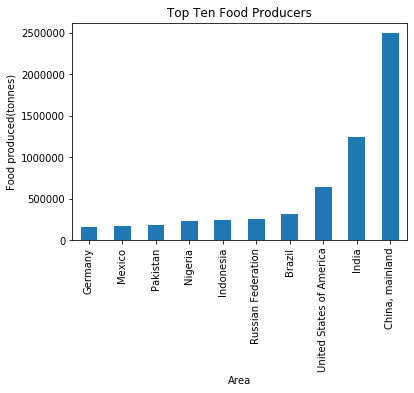

In [87]:
plot_data = data[data['Element'] == 'Food']
plot_data = plot_data.groupby('Area')['Y2013'].sum()
plot_data.sort_values()[-10:].plot(kind = 'bar')
plt.title("Top Ten Food Producers")
plt.ylabel("Food produced(tonnes)")
plt.show()